In [58]:
import tmm 
import EFI_tmm as EFI_tmm 
import sys 

(0.9999970467961987+5.794301668689817e-16j)


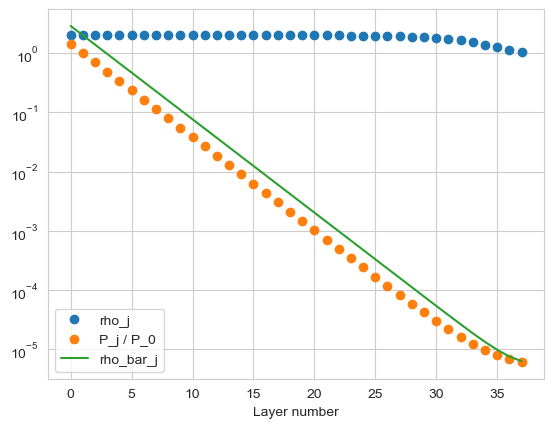

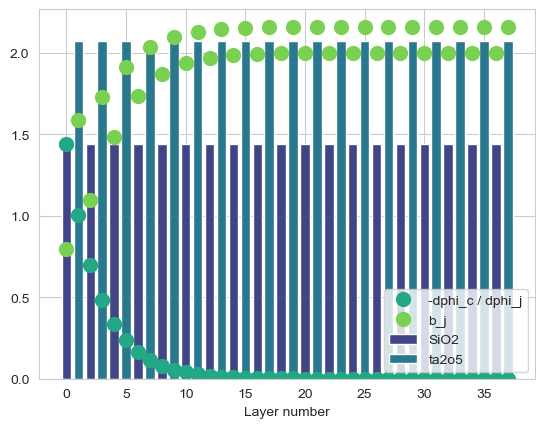

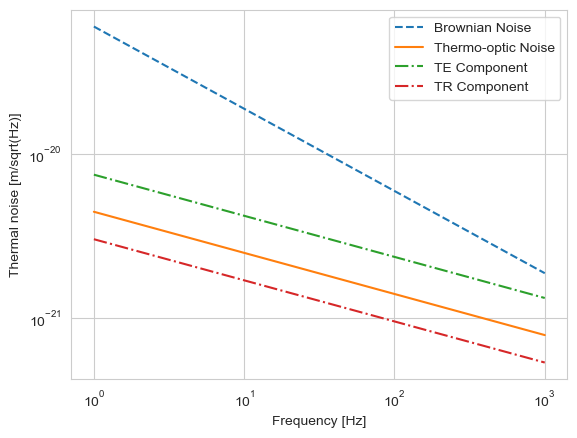

(0.9999970467961987+5.794301668689817e-16j)


In [59]:
#from thermal_noise_hong import getCoatBrownian
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random
import os 


import sys
sys.path.append("pwd")

import YAM_CoatingBrownian 

#set up interferometer parameters 

wBeam = 0.062;               # 6cm beam for aLIGO 
lambda_ = 1064e-9;           # laser wavelength

Temp = 293;                  # temperature - Room temperature 
f = np.logspace(0, 3, 100);  # frequencies for plotting

## set up aLIGO Coating Stack to benchmark functions 
num21 = 19  # number of 1-2 doublets (includes cap)
num34 = 0   # number of 3-4 doublets

# Using list comprehension to replicate the behavior of MATLAB's repmat
materialLayer = [1, 2] * num21 + [1, 2] * num34
materialLayer = np.array(materialLayer)

dOpt =np.ones(len(materialLayer))*0.25 
dOpt =np.array(dOpt)


materialParams = {
    1: {
        'name': 'SiO2',
        'n': 1.44,
        'a': 0,
        'alpha': 0.51e-6,
        'beta': 8e-6,
        'kappa': 1.38,
        'C': 1.64e6,
        'Y': 72e9,
        'prat': 0.17,
        'phiM': 4.6e-5
    },
    2: {
        'name': 'ta2o5',
        'n': 2.07,
        'a': 2,
        'alpha': 3.6e-6,
        'beta': 14e-6,
        'kappa': 33,
        'C': 2.1e6,
        'Y': 140e9,
        'prat': 0.23,
        'phiM': 2.44e-4
    }
}

noise_summary, rCoat, dcdp, rbar, r = YAM_CoatingBrownian.getCoatingThermalNoise(dOpt, materialLayer, materialParams, materialSub=1, lambda_=lambda_, f=f, wBeam=wBeam, Temp=Temp)

print(rCoat)

In [13]:
materialParams = {
    1: {
        'name' : 'SiO2',
        'n'    : 1.45,
        'a'    : 0,
        'alpha': 0.51e-6, # Fejer et al
        'beta' : 8e-6,    # dn/dT,        (ref. 14)
        'kappa': 1.38,
        'C'    : 1.64e6,  # Crooks et al, Fejer et al
        'Y'    : 70e9,    # 2020 LMA
        'prat' : 0.17,
        # 'phiM' : 1.25e-5, # silica mechanical loss
        'phiM' : 2.3e-5,    #Grand Coater 

        # 'k'    : 0,       #        right now assuming absorption of silica at 1064 is negligable.
        'k'    : 3E-8,       #        right now assuming absorption of silica at 1064 is negligable.
        
    },
    2: {
        'name' : 'Ti:Ta2O5',
        'n'    : 2.09,       # 2020 LMA
        'a'    : 2,
        'alpha': 3.6e-6,     # 3.6e-6 Fejer et al,             5e-6 from Braginsky
        'beta' : 14e-6,      # dn/dT,                          value Gretarrson (G070161)
        'kappa': 33,         # Fejer et al
        'C'    : 2.1e6,      # Crooks et al,                   Fejer et al
        'Y'    : 120e9,      # Ta2O5-TiO2 from 2020 LMA https: //iopscience.iop.org/article/10.1088/1361-6382/ab77e9
        'prat' : 0.23,
        # 'phiM' : 2.3E-4,     # tantala mechanical loss
        'phiM' : 3.6E-4,     # tantala mechanical loss
        # 'k'    : 1E-7,       # measured by S.Tait for RLVIP tantala  at 1064nm
        'k'    : 5E-8,       #Grand Coater 
        
    },
}




In [ ]:
def optical_to_physical(optical_thickness, vacuum_wavelength, refractive_index):
    physical_thickness = optical_thickness*vacuum_wavelength/ refractive_index
    return physical_thickness

### TMM calculation of reflectivity 

In [53]:

materialLayer = [1, 2] * num21 + [1, 2] * num34

nLayer = []

for n, mat in enumerate(materialLayer):    
    nLayer.append(materialParams[mat]['n'])
    
physical_thicknesses = [] 

for i ,a in enumerate(dOpt):    
    
    if i ==0 or i ==len(dOpt)-1: 
        physical_thicknesses.append(np.inf)
        
    else:
        x = coatDef.optical_to_physical(dOpt[i],1064E-9,nLayer[i])
        physical_thicknesses.append(x)
        
tmm.coh_tmm('s',nLayer, physical_thicknesses, 0, 1064E-9)['R']

0.999994663428542

### Value of reflectivity from YamCoatingBrownain 

In [57]:
np.real(rCoat)

0.9999970467961987